<a href="https://colab.research.google.com/github/Ekansh0801/90-DAYS-OF-MACHINE-LEARNING/blob/main/DAY_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Logistic Regression From Scratch

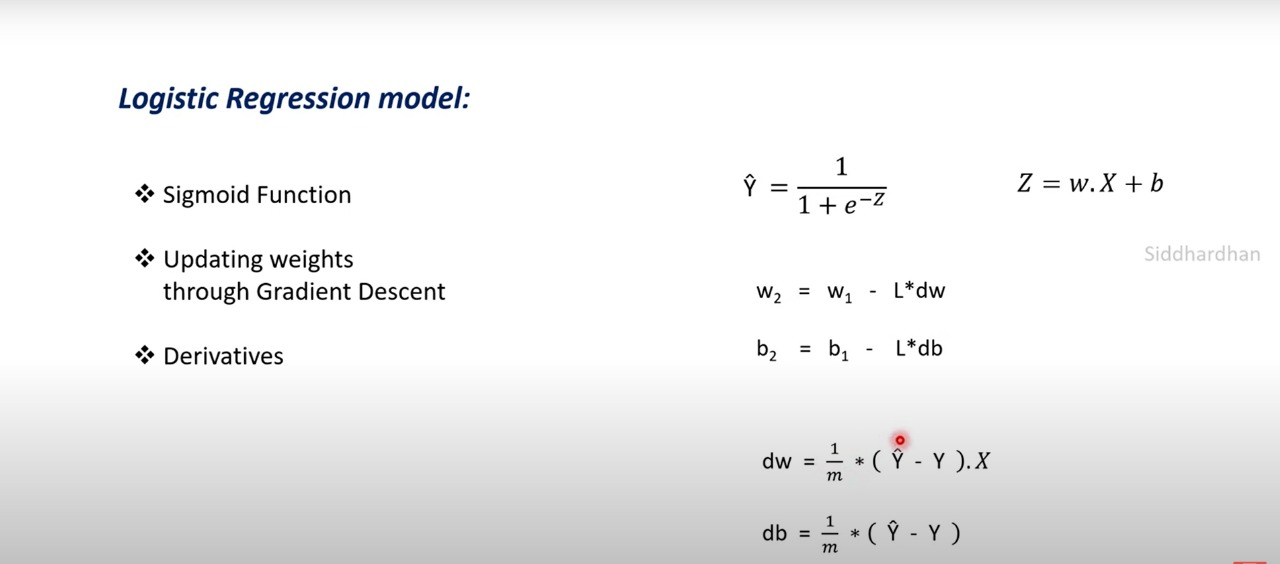

### Importing the dependencies

In [1]:
import numpy as np

### **Logistic Regression**

In [28]:
class Logistic_Regression():

  # declaring learning rate and number of iterations (hyperparameters)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  # fit function to train the model
  def fit(self,X,Y):
    self.m,self.n = X.shape

    # initiate weight and bias
    self.w = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.Y = Y

    # implementing the gradient descent

    for i in range(self.no_of_iterations):
      self.updateWeights()


  def updateWeights(self):

    y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b)))

    dw = (1/self.m)*np.dot(self.X.T,(y_hat - self.Y))
    db = (1/self.m)*np.sum(y_hat - self.Y)

    self.w = self.w  - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b)))
    y_pred = np.where(y_pred > 0.5 , 1, 0)
    return y_pred

### Implementing Logistic Regression

### Importing Dependencies

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Collection and Analysis

In [4]:
# loading the data into pandas dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [5]:
# printing first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# printing number of rows and columns
diabetes_dataset.shape

(768, 9)

In [8]:
# getting statistical measures
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


### 0 -> Non - Diabetic
### 1 -> Diabetic

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# seperating data and labels
features = diabetes_dataset.drop(columns='Outcome',axis = 1)
target = diabetes_dataset['Outcome']

In [14]:
print(features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [15]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Sandardization

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(features)

StandardScaler()

In [18]:
standardized_data = scaler.transform(features)

In [19]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [21]:
print(features)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test Split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=2)

In [25]:
print(features.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

In [29]:
classifier = Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [30]:
classifier.fit(X_train,Y_train)

### Model Evaluation

#### Accuracy Score

In [31]:
# accuracy score on training data
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,x_train_prediction)

In [32]:
print('Training Data Accuracy: ', training_data_accuracy)

Training Data Accuracy:  0.7768729641693811


In [34]:
# accuracy score on testing data
x_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,x_test_prediction)

In [35]:
print('Testing Data Accuracy: ', testing_data_accuracy)

Testing Data Accuracy:  0.7662337662337663


### Making a Predictive System

In [36]:
from re import S
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardized the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print('The Person is Non - Diabetic')

else:
  print('The Person is Diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
